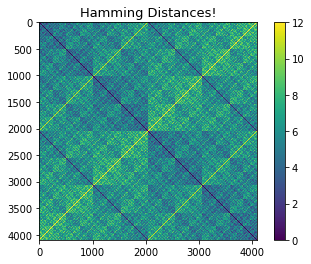

In [1]:
import numpy as np

from tqdm import tqdm

from scipy.spatial import distance

import matplotlib.pyplot as plt
%matplotlib inline


def hammingDistance(n1, n2):
    return bin(np.bitwise_xor(n1, n2)).count("1")

N = 12  # binary code of length N
D = 8  # with minimum distance D

M = 2**N  # number of unique codes in general

# construct hamming distance matrix
A = np.zeros((M, M), dtype=int)
for i in range(M):
    for j in range(i+1, M):
        A[i, j] = hammingDistance(i, j)
A += A.T

plt.imshow(A); plt.colorbar();
plt.title("Hamming Distances!", fontsize=13);

#### Finding the maximal group of numbers with >= D for initial number "i" 

O(n!) - for a given set of numbers, find a sub-set that each of its numbers are at least D from the first number in numbers

For instance - for a set that contains number 2 ('0...010'), construct the maximal group of numbers with minimum hamming-distance D

In [2]:
def recursivly_find_legit_numbers(nums, codes=set()):
    
    codes_to_probe = nums
    for num1 in nums:
        codes.add(num1)
        codes_to_probe = codes_to_probe - {num1}
        for num2 in nums - {num1}:
            if A[num1, num2] < D:
                "Distance isn't sufficient, remove this number from set"
                codes_to_probe = codes_to_probe - {num2}

        if len(codes_to_probe):
            recursivly_find_legit_numbers(codes_to_probe, codes)
            
        return codes


In [3]:
group_of_codes = {}
for i in tqdm(range(M)):
    satisfying_numbers = np.where(A[i] >= D)[0]
    satisfying_numbers = satisfying_numbers[satisfying_numbers > i]
    nums = set(satisfying_numbers)
    if len(nums) == 0:
        continue
    group_of_codes[i] = recursivly_find_legit_numbers(nums, set())
    group_of_codes[i].add(i)


100%|█████████████████████████████████████████████████████████████████████████████| 4096/4096 [00:07<00:00, 559.07it/s]


In [4]:
largest_group = 0
for i, nums in group_of_codes.items():
    if len(nums) > largest_group:
        largest_group = len(nums)
        ind = i

print(f"largest group for N={N} and D={D}: {largest_group}")
print("Number of unique groups:", len(group_of_codes))

largest group for N=12 and D=8: 4
Number of unique groups: 3968


In [5]:
# generate largest group of codes

[format(num, f"0{N}b") for num in group_of_codes[ind]]

['010011111000', '000000000011', '101100011100', '111111100111']

In [8]:
# generate codes

# select binary-codes where the smallest code is 4
[format(num, f"0{N}b") for num in group_of_codes[4 - 1]]

['0011', '0100', '1000', '1101', '1110']

In [9]:
# select binary-codes where the smallest code is 100
[format(num, f"0{N}b") for num in group_of_codes[4 - 1]]

['0011', '0100', '1000', '1101', '1110']